# Intro

* In this chapter we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “hello world” of machine learning: whenever people come up with a new classification algorithm they are curious to see how it will perform on MNIST, and anyone who learns machine learning tackles this dataset sooner or later.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X, y = mnist.data, mnist.target

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
print("X Shape: ", X.shape) 
print("y Shape: ", y.shape)

X Shape:  (70000, 784)
y Shape:  (70000,)


*  There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

* Let’s take a peek at one digit from the dataset.

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.figure(figsize=(3, 2))
    plt.imshow(
        image,
        cmap='binary'
    )
    plt.axis('off')

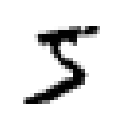

In [7]:
some_digit = X[0]
plot_digit(some_digit)
plt.show()

* It's look like 5, let's check it.

In [8]:
y[0]

'5'

* Hot Dammnn ! it's 🔥

* Create Test Set

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[6000], y[:60000], y[60000:]

# Training a Binary Classifier

* Try to identify one digit, the number 5.

In [10]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

* Let's use SGDClassifier.

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state =42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## Measuring Accuracy Using Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

* Let's do it by DummyClassifier

In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(
    any(
        dummy_clf.predict([X_train])
    )
)



False


It's `False` because of Dummy Classifier and its prediction strategy.

In [15]:
cross_val_score(
    dummy_clf,
    X_train,
    y_train_5,
    cv=3,
    scoring="accuracy"
)

array([0.90965, 0.90965, 0.90965])

* A much better way to evaluate the performance of a classifier is to look at the `confusion matrix (CM)`.

* Implementing Cross-Validation

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is
                                      # not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
   clone_clf = clone(sgd_clf)
   X_train_folds = X_train[train_index]
   y_train_folds = y_train_5[train_index]
   X_test_fold = X_train[test_index]
   y_test_fold = y_train_5[test_index]
   clone_clf.fit(X_train_folds, y_train_folds)
   y_pred = clone_clf.predict(X_test_fold)
   n_correct = sum(y_pred == y_test_fold)
   print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


## Confusion Matrix

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [20]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision & Recall

In [21]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


* When we compare two classifier, F1 is used.

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

## The Precision/Recall Trade-off

* Instead of calling the classifier's predict method, decision_function() method can be used which returns a score for each instance.

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [25]:
threshold=3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

* This confirms that raising the threshold decreases recall. The image actually repreent a 5, and the classifier detects it when the threshold s 0, but it misses it when the threshold is increased to 3000.

* How do we decide which threshold to use ?

In [26]:
y_scores = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    method="decision_function"
)

In [27]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

* Let's visuzalize these scores

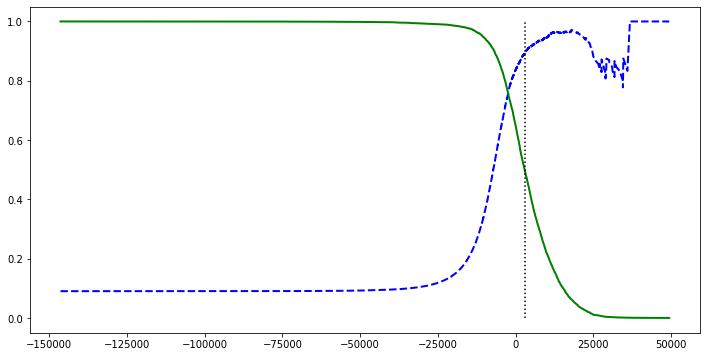

In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(
    y_train_5,
    y_scores
)

plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()

* Another way to selct a good precision/recall traade-off is to plot precision directly against recall.

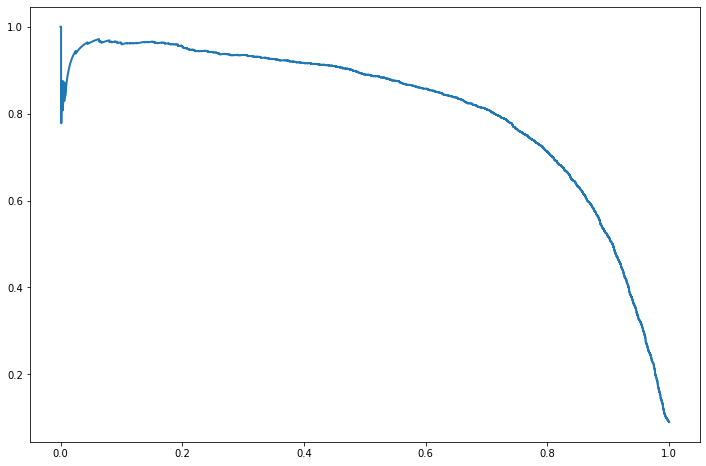

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(
    recalls,
    precisions,
    linewidth=2,
    label="Preicison/Recall curve"
)

* Suppose you decide to aim for 90% precision. You could use the first plot to find the threshold you need to use, but that’s not very precise. Alternatively, you can search for the lowest threshold that gives you at least 90% precision. For this, you can use the NumPy array’s argmax() method. This returns the first index of the maximum value, which in this case means the first True value:

In [30]:
idx_for_90_precision = (precisions >=0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439594

In [31]:
y_train_pred_90 =  (y_scores >= threshold_for_90_precision)

In [32]:
precision_score(
    y_train_5,
    y_train_pred_90,
)

0.9000345901072293

In [33]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

## The ROC Curve

* The plot the ROC curve, you first use the roc_curve() function to compute the TPR and FPR for various threshold values:

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

* Then after getting FPR and TPR, let's plot them !

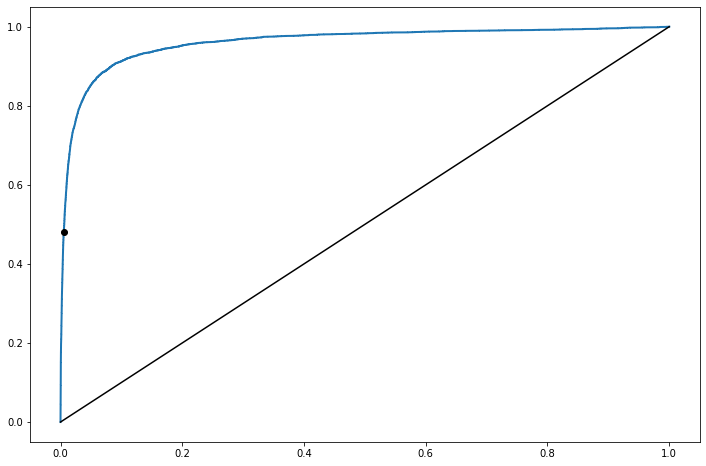

In [35]:
idx_for_threshold_at_90 = ( thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0,1], [0,1], 'k', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for %90 precision")
plt.show()

* There is a trade-off between TPR & FPR.
* One way to compare classifieres is to measure the area under the curve (AUC).
* A perfect classifier will have a ROC AUC equal to 1.
* The curve could really be closer to the top-right corner.

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

* Let's now create a RandomForestClassifier, whose PR curve and F1 score we can compare the those of the SGDClassifier.

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [38]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

* The model predicts thqt the first image is positive with %89 probability, and it predicts that the second image is negative with %99 probaility. Since each image is either positive or negative, the probabilities in each row add up to %100.

* The second column contains the estimated probabilities for the positive class, so let's pass them to the precision_recall_curve() function

In [39]:
y_scores_forest = y_probas_forest[:, 1]
precision_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

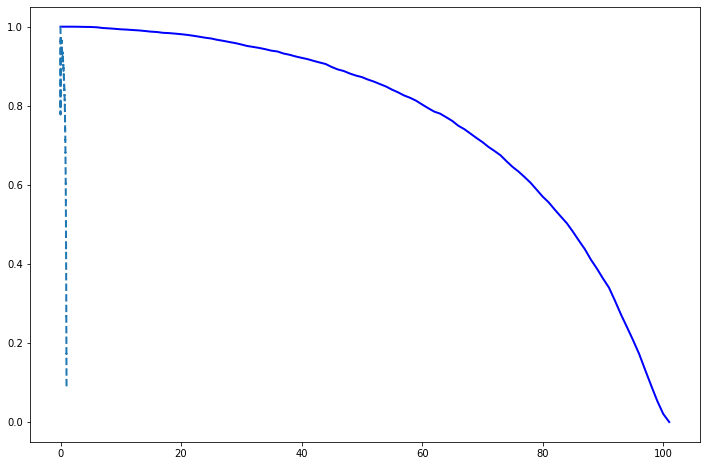

In [40]:
plt.figure(figsize=(12, 8))

plt.plot(recalls_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.show()

* It comes much closer to the top-right corber
* Its F1 and ROC AUC score are also significantly better.

In [41]:
y_train_pred_forest = y_probas_forest[:, 1]>=0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

* Let's measure the precision and recall scores.

In [43]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

# Multiclass Classification

*  Let’s try this with a support vector machine classifier using the sklearn.svm.SVC class We’ll only train on the first 2,000 images, or else it will take a very long time.

In [44]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # y_train not y_train_5 bc, try to classfy more than one class.

SVC(random_state=42)

*  Since there are 10 classes (i.e., more than 2), Scikit-Learn used the OvO strategy and trained 45 binary classifiers. 
* Let's predict our sample.

In [45]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

* To see prediction scores, let's call decision_function() method.

In [46]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

* When we look to the array, we can clearly see that at index of '5' score is 9.3 corresponding to class 5.

In [48]:
class_id = some_digit_scores.argmax()
class_id

5

*  When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value. In the case of MNIST, the index of each class in the classes_ array conveniently matches the class itself (e.g., the class at index 5 happens to be class '5'), but in general you won’t be so lucky; you will need to look up the class label like this:

In [49]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [50]:
svm_clf.classes_[class_id]

'5'

* If you want to force Scikit-Learn to use one-versus-one or one-versus-the rest, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a classifier to its constructor (it doesn’t even have to be a binary classifier). For example, this code creates a multiclass classifier using the OvR strategy, based on an SVC

In [51]:
from  sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

*  Let’s make a prediction, and check the number of trained classifiers:

In [52]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [53]:
len(ovr_clf.estimators_)

10

*  Training an SGDClassifier on a multiclass dataset and using it to make predictions is just as easy

In [55]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

* There is a error in prediction. Let's check decision_function()

In [57]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

* Let's evaluate with cross_val_score() model.

In [58]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

* It gets over 85.8% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better. Simply scaling the inputs increases accuracy above 89.1%:

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


array([0.8983, 0.891 , 0.9018])

# Error Analysis

* Let's assume that we have found a promising model and we want to find ways to improve it. One way to do this is to analyze the types of errors it makes. First, look at the confusion matrix. For this, firstly we need to make predictions using the cross_val_predict() function; then we can pass the labels and predictions to the confusion_matrix() function. However, since there are now 10 classes instead of 2, the confusion matrix will contain quite a lot of numbers, and it may be hard to read.

* To plot such a diagram, we can use the 'ConfusionMatrixDisplay.from_predictions()' function

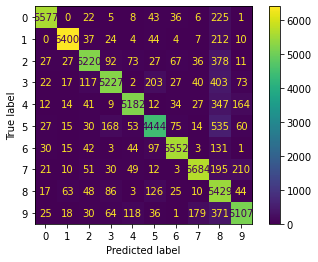

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()